In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import nbinom
from tqdm.notebook import trange, tqdm
import seaborn as sns 
import pandas as pd
import noisets
from noisets import noisettes as ns
import scipy.stats as stats

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Helvetica"]})

plt.rc('xtick', labelsize = 18)
plt.rc('ytick', labelsize = 18)

from matplotlib import cm, colors, colorbar
cmap = cm.get_cmap('viridis_r')

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


The results displayed in the following were obtained using the python script Generator_inference_synthetic.py, and the naive_inference_fthresh function which can be found in naive_estimations_utils

In [2]:
#A = -tau^{-1} 

A_naive_final = np.array([-0.1, -0.1, -0.1, -0.2, -0.2, -0.2, -0.5, -0.5, -0.5, -1., -1., -1.])
A_naive_final_5 = np.array([-0.22344639, -0.21504258, -0.21076626, -0.28010722, -0.28038052, -0.28931885,  -0.37580815, -0.38276784, -0.40023795, -0.43686571, -0.47443906, -0.48929122])
A_naive_final_100 = np.array([-0.09877715, -0.0855277, -0.10278174, -0.1768418, -0.18639793, -0.16494478, -0.42336374, -0.44937598, -0.46833078, -0.74577825, -0.78572489, -0.79820102])
A_naive_std_final_5 = np.array([0.00992267, 0.00684273, 0.01827114, 0.00614297 , 0.014111, 0.014111, 0.0140826, 0.01109828, 0.03835754, 0.02431586, 0.00684273, 0.03769661])
A_naive_std_final_100 = np.array([0.02885707, 0.01931631, 0.02086049, 0.03171528, 0.02822999, 0.02822999, 0.03986328, 0.03526678, 0.06733359, 0.07491958, 0.09109988, 0.04755645])

In [3]:
#B = theta^{-1} 

B_naive_final = np.array([0.16, 0.17, 0.18, 0.32, 0.34, 0.36,0.8, 0.85, 0.9, 1.6, 1.7, 1.8])
B_naive_final_5 = np.array([0.357035, 0.35294435, 0.357035, 0.44378588, 0.4596648, 0.4787678,   0.72977725, 0.75649752, 0.79300253, 0.96260632, 1.00625519, 1.09223941])
B_naive_final_100 = np.array([0.17530247, 0.18291669, 0.20250137, 0.32828046, 0.36258952, 0.36899949, 0.83457558, 0.87484752, 0.96833894, 1.41397083, 1.50758269, 1.5946313])
B_naive_std_final_5 = np.array([0.01060387, 0.00753499, 0.008227, 0.01259178, 0.00945722, 0.00945722, 0.01563058, 0.02054726, 0.01894175, 0.02939362, 0.0312526, 0.03632969])
B_naive_std_final_100 = np.array([0.0287572, 0.01715107, 0.01804476, 0.04890299, 0.04076982, 0.04076982,  0.14339835, 0.08820615, 0.10410409, 0.28459762, 0.14963109, 0.08965151])

In [4]:
#A_inf synthetic

A_sim_final = np.array([-0.1, -0.1, -0.1, -0.2, -0.2, -0.2, -0.5, -0.5, -0.5, -0.8, -0.8, -0.8, -1., -1., -1.])
A_inf_final_5 = np.array([-0.07540792, -0.0786155, -0.08415637, -0.14555058, -0.1636522, -0.18613965, -0.39237801, -0.40987855, -0.44099517, -0.6301314261324229, -0.6704675691712773, -0.6722375144368617,  -0.78545015, -0.83365463, -0.85817595])
A_inf_final_100 = np.array([-0.08580777, -0.06968729, -0.08933838, -0.16250295, -0.17625563, -0.15335525, -0.45397336, -0.43299047, -0.46045236, -0.6472805130032953, -0.685612067757861, -0.6951759151943916,   -0.81967329, -0.87699962, -0.93043757])
A_inf_std_final_5 = np.array([0.0103821, 0.00716073, 0.01951587, 0.01060588, 0.01441967, 0.00778075, 0.01942057, 0.01052952, 0.04558256, 0.020262484000255356, 0.028812441196866725, 0.0575812627783647, 0.05154736, 0.0316091, 0.05922912])
A_inf_std_final_100 = np.array([0.02466695, 0.02014992, 0.02128533, 0.03922189, 0.02639182, 0.00924289, 0.0330016, 0.03770168, 0.06827602, 0.06552630350834777, 0.0423966149594955, 0.052191209312551064,  0.10463051, 0.10435248, 0.07208409])

In [5]:
#B_inf synthetic

B_sim_final = np.array([0.16, 0.17, 0.18, 0.32, 0.34, 0.36, 0.8, 0.85, 0.9, 1.28, 1.36, 1.44, 1.6, 1.7, 1.8])
B_inf_final_5 = np.array([0.15786785, 0.1668661, 0.17850144 , 0.31296149, 0.33320628 , 0.35884316, 0.80108133, 0.83226038, 0.89591142, 1.2780285933514464, 1.344884778288534, 1.4154030742327854,  1.64097623, 1.68334086, 1.80985531])
B_inf_final_100 = np.array([0.15481819, 0.16652502, 0.18641335, 0.32662277, 0.35427951, 0.34942336, 0.80234687, 0.78670347, 0.86748661, 1.20591019965646, 1.2600427855105996, 1.312923621107413, 1.38356485, 1.51503914, 1.73287465])
B_inf_std_final_5 = np.array([0.00424466, 0.00624253, 0.00560883 , 0.01368157, 0.00589526 , 0.00655532, 0.01903361, 0.02073295, 0.01847888, 0.02234333537457918, 0.03365805873865154, 0.03610420579254099,   0.18524487, 0.08304035, 0.04903615])
B_inf_std_final_100 = np.array([0.02466695, 0.0165631, 0.01766024, 0.08413674, 0.04112913, 0.00470323, 0.16519244, 0.04454162, 0.07888798, 0.16601082594120614, 0.04838115721379074, 0.03348396372186603,  0.21297714, 0.27638335, .21921294])

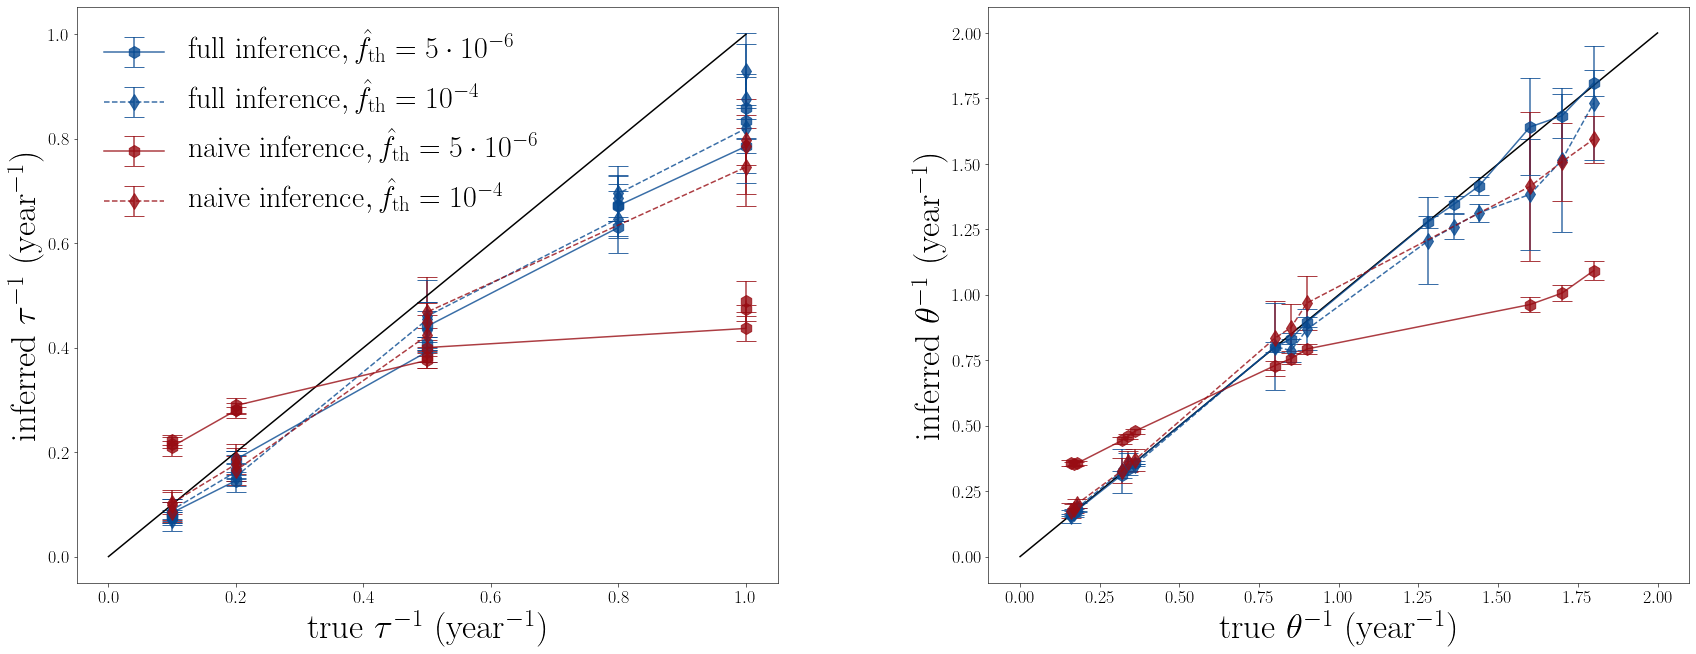

In [8]:
fig, ((ax1,ax2)) = plt.subplots(1,2,figsize=(28,10))
plt.rc('text', usetex=True)
x = np.linspace(0,1,100)
colors = plt.cm.Blues_r(np.linspace(0.1, 0.8, 3))
colors_naive = plt.cm.Reds_r(np.linspace(0.1, 0.8, 3))

# Subplot 1

ax1.errorbar(-A_sim_final, -A_inf_final_5, yerr = A_inf_std_final_5 , capsize=10, color = colors[0], linestyle= '-', alpha=0.8, marker = 'h', markersize = 12, label = r'$ {\rm{full \ inference}}, \hat{f}_{ \rm{th} } = 5 \cdot 10^{-6} $'  )
ax1.errorbar(-A_sim_final, -A_inf_final_100, yerr = A_inf_std_final_100 , capsize=10, color = colors[0], linestyle= '--', alpha=0.8, marker = 'd', markersize = 12, label = r'$ {\rm{full \ inference}}, \hat{f}_{ \rm{th} } = 10^{-4} $' )
ax1.errorbar(-A_naive_final, -A_naive_final_5, yerr = A_naive_std_final_5 , capsize=10, color = colors_naive[0], linestyle= '-', alpha=0.8, marker = 'h', markersize = 12, label = r'$ {\rm{naive \ inference}}, \hat{f}_{ \rm{th} } = 5 \cdot 10^{-6} $' )

ax1.errorbar(-A_naive_final, -A_naive_final_100, yerr = A_naive_std_final_100 , capsize=10, color = colors_naive[0], linestyle= '--', alpha=0.8, marker = 'd', markersize = 12, label = r'$ {\rm{naive \ inference}}, \hat{f}_{ \rm{th} } = 10^{-4} $')
ax1.plot(x,x, color = 'k')

ax1.legend(fontsize=30, frameon = False)
ax1.set_xlabel(r' true $ \tau^{-1} \ (\rm{year}^{-1})$', fontsize = 35)
ax1.set_ylabel(r' inferred $ \tau^{-1} \ (\rm{year}^{-1}) $', fontsize = 35)


ax1.xaxis.set_tick_params(width=.6)
ax1.yaxis.set_tick_params(width=.6)
plt.setp(ax1.spines.values(), linewidth=.6)

# Subplot 2
colors = plt.cm.Blues_r(np.linspace(0.1, 0.8, 3))
colors_naive = plt.cm.Reds_r(np.linspace(0.1, 0.8, 3))


x_B = np.linspace(0,2,100)

ax2.errorbar(B_sim_final, B_inf_final_5, yerr = B_inf_std_final_5 , capsize = 10, color = colors[0], linestyle= '-', alpha=0.8, marker = 'h', markersize = 12, label = r'$ {\rm{full \ inference}}, \hat{f}_{ \rm{th} } = 510^{-6} $'  )
ax2.errorbar(B_sim_final, B_inf_final_100, yerr = B_inf_std_final_100 , capsize = 10, color = colors[0], linestyle= '--', alpha=0.8, marker = 'd', markersize = 12, label = r'$ {\rm{full \ inference}}, \hat{f}_{ \rm{th} } = 1.10^{-4} $')
ax2.errorbar(B_naive_final, B_naive_final_5, yerr = B_naive_std_final_5 , capsize = 10, color = colors_naive[0], linestyle= '-', alpha=0.8, marker = 'h', markersize = 12, label = r'$ {\rm{naive \ inference}}, \hat{f}_{ \rm{th} } = 5.10^{-6} $')
ax2.errorbar(B_naive_final, B_naive_final_100, yerr = B_naive_std_final_100 , capsize = 10, color = colors_naive[0], linestyle= '--', alpha=0.8, marker = 'd', markersize = 12, label = r'$ {\rm{naive \ inference}}, \hat{f}_{ \rm{th} } = 1.10^{-4} $')

ax2.plot(x_B,x_B, color = 'k')
ax2.set_xlabel(r' true $ \theta^{-1} \ (\rm{year}^{-1})$', fontsize = 35)
ax2.set_ylabel(r' inferred $ \theta^{-1} \ (\rm{year}^{-1}) $', fontsize = 35)

ax2.xaxis.set_tick_params(width=.6)
ax2.yaxis.set_tick_params(width=.6)
plt.setp(ax2.spines.values(), linewidth=.6)

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.3)

#fig.savefig('/Users/bensouda/Documents/PhD/Codes_figures/Fig3_sub.pdf', bbox_inches='tight')

plt.show()